In [19]:
import pandas as pd
b_mlp_healthy = pd.read_csv('binary_mlp_healthy_tumor.txt')
b_dnn_healthy = pd.read_csv('b_DNN_healthy_tumor.txt')

b_mlp_stil_tumor = pd.read_csv('binary_MLP_sTIK_tumor.txt')
b_dnn_stil_tumor = pd.read_csv('b_DNN_stil_tumor.csv')

sup3_dnn = pd.read_csv('sup3_DNN.txt')
sup3_mlp = pd.read_csv('sup3_MLP.txt')

In [20]:
b_dnn_stil_tumor.head()

,Epoch,Train Loss,Train Accuracy,Validation Loss,Validation Accuracy,Train Class 0,Train Class 1,Validation Class 0,Validation Class 1
0,1,0.459032,0.797518,0.388887,0.844454,0.821150,0.856092,0.825344,0.859432
1,2,0.409642,0.827496,0.415380,0.838268,0.835735,0.841318,0.837077,0.839201
2,3,0.404876,0.830258,0.402101,0.841361,0.870203,0.814007,0.873952,0.815817
3,4,0.396417,0.834272,0.372193,0.844896,0.853968,0.841701,0.856520,0.835786
4,5,0.387718,0.838471,0.391713,0.839152,0.877062,0.808251,0.877305,0.809249


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def compare_validation_accuracies_healthy(df1, df2):
    # Ensure 'Validation Accuracy' column exists in both dataframes
    if 'Validation Accuracy' not in df1.columns or 'Validation Accuracy' not in df2.columns:
        raise ValueError("Both dataframes must contain 'Validation Accuracy' column.")

    # Interpolate smaller dataframe to match the larger one's size
    max_len = max(len(df1), len(df2))
    x_new = np.linspace(0, 1, max_len)  # normalized x-axis for interpolation

    # Prepare interpolation
    x1 = np.linspace(0, 1, len(df1))
    x2 = np.linspace(0, 1, len(df2))

    # Interpolated data
    val_acc1 = np.interp(x_new, x1, df1['Validation Accuracy'])
    val_acc2 = np.interp(x_new, x2, df2['Validation Accuracy'])

    # Plotting Validation Accuracy
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    plt.plot(x_new, val_acc1, label='Validation Accuracy MLP')
    plt.plot(x_new, val_acc2, label='Validation Accuracy DenseNet')
    plt.title('Validation Accuracy Comparison', fontsize=32)
    plt.xlabel('Epochs (normalized)',fontsize=32)
    plt.ylabel('Accuracy', fontsize=32)
    plt.legend(fontsize=22)

    # Bar Plot for Max Values
    plt.subplot(1, 2, 2)
    # Gather maximum values
    max_values = {
        'Healthy': [df1['Validation Class 0'].max(), df2['Validation Class 0'].max()],
        'Tumor': [df1['Validation Class 1'].max(), df2['Validation Class 1'].max()]
    }
    # Create bar plot
    bar_df = pd.DataFrame(max_values, index=['Healthy', 'Tumor'])
    bar_df.plot(kind='bar', ax=plt.gca())
    plt.title('Maximum Validation Class Values', fontsize=32)
    plt.ylabel('Max Class Value', fontsize=32)
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()


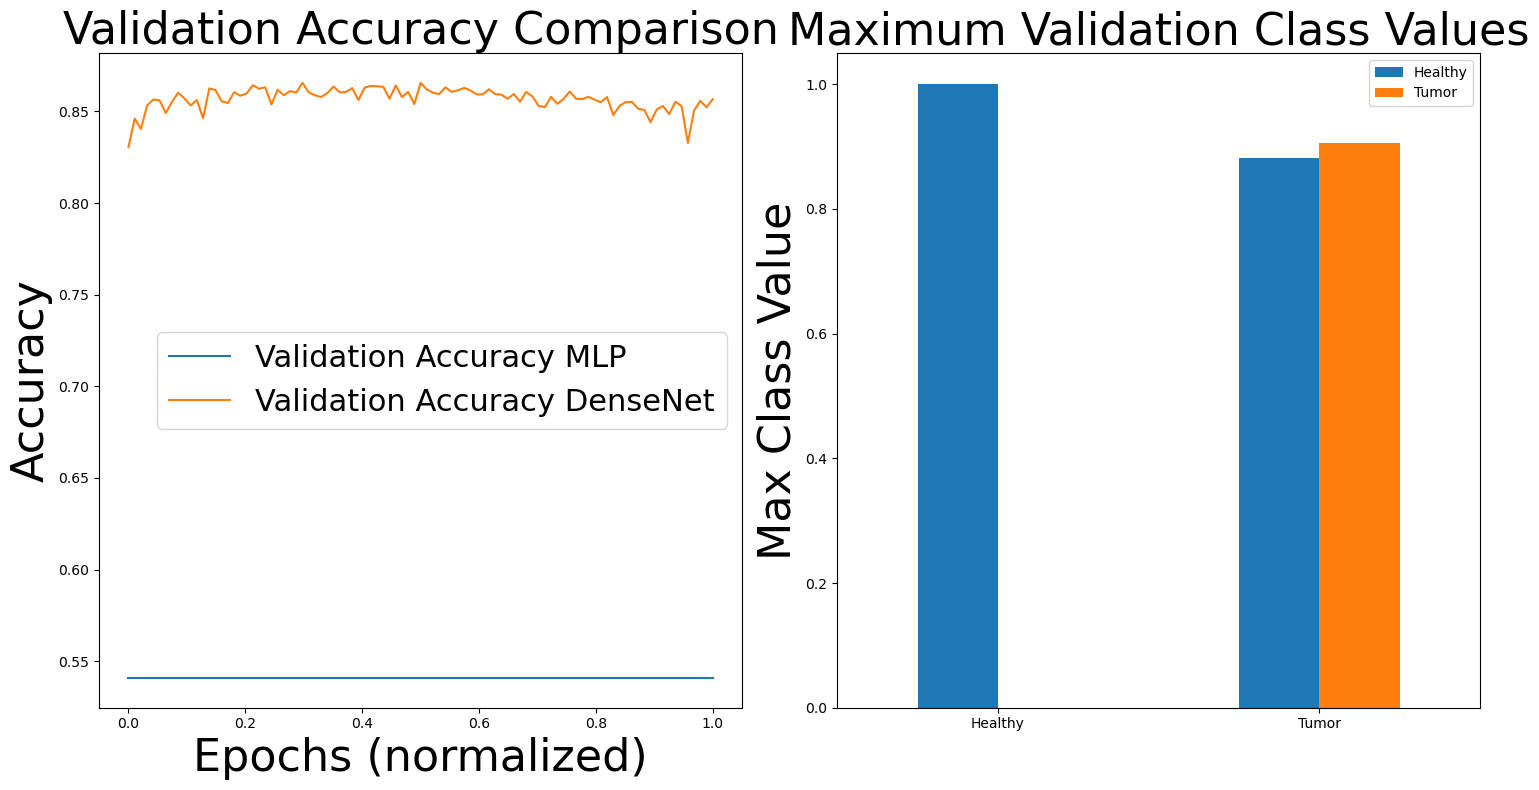

In [54]:
compare_validation_accuracies_healthy(b_mlp_healthy, b_dnn_healthy)

In [49]:

def compare_validation_accuracies_stil(df1, df2):
    # Ensure 'Validation Accuracy' column exists in both dataframes
    if 'Validation Accuracy' not in df1.columns or 'Validation Accuracy' not in df2.columns:
        raise ValueError("Both dataframes must contain 'Validation Accuracy' column.")

    # Interpolate smaller dataframe to match the larger one's size
    max_len = max(len(df1), len(df2))
    x_new = np.linspace(0, 1, max_len)  # normalized x-axis for interpolation

    # Prepare interpolation
    x1 = np.linspace(0, 1, len(df1))
    x2 = np.linspace(0, 1, len(df2))

    # Interpolated data
    val_acc1 = np.interp(x_new, x1, df1['Validation Accuracy'])
    val_acc2 = np.interp(x_new, x2, df2['Validation Accuracy'])

    # Plotting Validation Accuracy
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x_new, val_acc1, label='Validation Accuracy MLP')
    plt.plot(x_new, val_acc2, label='Validation Accuracy DenseNet')
    plt.title('Validation Accuracy Comparison', fontsize=32)
    plt.xlabel('Epochs (normalized)',fontsize=32)
    plt.ylabel('Accuracy', fontsize=32)
    plt.legend(fontsize=22)

    # Bar Plot for Max Values
    plt.subplot(1, 2, 2)
    # Gather maximum values
    max_values = {
        'Healthy': [df1['Validation Class 0'].max(), df2['Validation Class 0'].max()],
        'Tumor': [df1['Validation Class 1'].max(), df2['Validation Class 1'].max()]
    }
    # Create bar plot
    bar_df = pd.DataFrame(max_values, index=['DF1', 'DF2'])
    bar_df.plot(kind='bar', ax=plt.gca())
    plt.title('Maximum Validation Class Values')
    plt.ylabel('Max Class Value')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

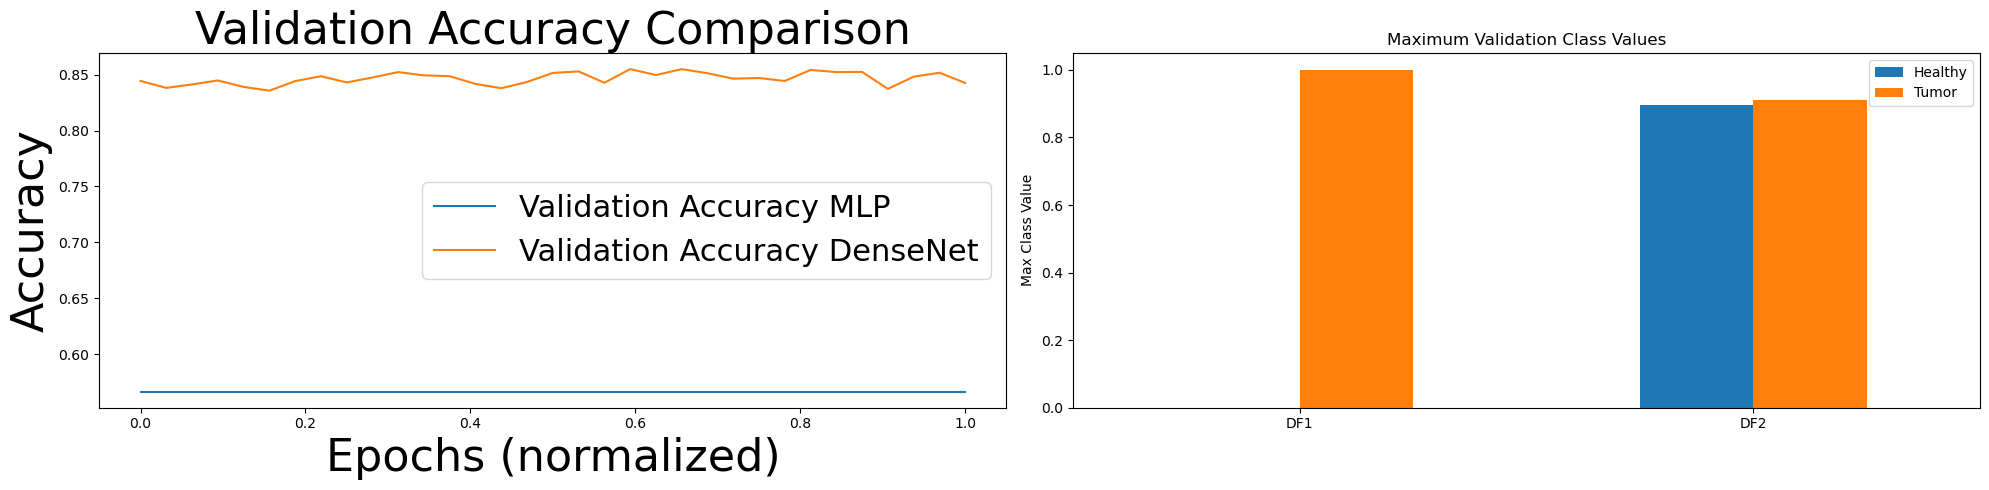

In [50]:
compare_validation_accuracies_stil(b_mlp_stil_tumor, b_dnn_stil_tumor)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compare_validation_accuracies_3class(df1, df2):
    # Ensure 'Validation Accuracy' column exists in both dataframes
    if 'Validation Accuracy' not in df1.columns or 'Validation Accuracy' not in df2.columns:
        raise ValueError("Both dataframes must contain 'Validation Accuracy' column.")

    # Check for necessary validation class columns in both dataframes
    required_columns = ['Validation Class 0', 'Validation Class 1', 'Validation Class 2']
    if not all(col in df1.columns for col in required_columns) or not all(col in df2.columns for col in required_columns):
        raise ValueError("Both dataframes must contain 'Validation Class 0', 'Validation Class 1', and 'Validation Class 2' columns.")

    # Interpolate smaller dataframe to match the larger one's size
    max_len = max(len(df1), len(df2))
    x_new = np.linspace(0, 1, max_len)  # normalized x-axis for interpolation

    # Prepare interpolation
    x1 = np.linspace(0, 1, len(df1))
    x2 = np.linspace(0, 1, len(df2))

    # Interpolated data
    val_acc1 = np.interp(x_new, x1, df1['Validation Accuracy'])
    val_acc2 = np.interp(x_new, x2, df2['Validation Accuracy'])

    # Plotting Validation Accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x_new, val_acc1, label='Validation Accuracy MLP')
    plt.plot(x_new, val_acc2, label='Validation Accuracy DenseNet')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs (normalized)')
    plt.ylabel('Accuracy')
    plt.legend()

    # Bar Plot for Max Values
    plt.subplot(1, 2, 2)
    # Gather maximum values
    max_values = {
        'Stromal': [df1['Validation Class 0'].max(), df2['Validation Class 0'].max()],
        'sTIL': [df1['Validation Class 1'].max(), df2['Validation Class 1'].max()],
        'Tumor': [df1['Validation Class 2'].max(), df2['Validation Class 2'].max()]
    }
    # Create bar plot
    bar_df = pd.DataFrame(max_values, index=['DF1', 'DF2'])
    bar_df.plot(kind='bar', ax=plt.gca())
    plt.title('Maximum Validation Class Values')
    plt.ylabel('Max Class Value')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()


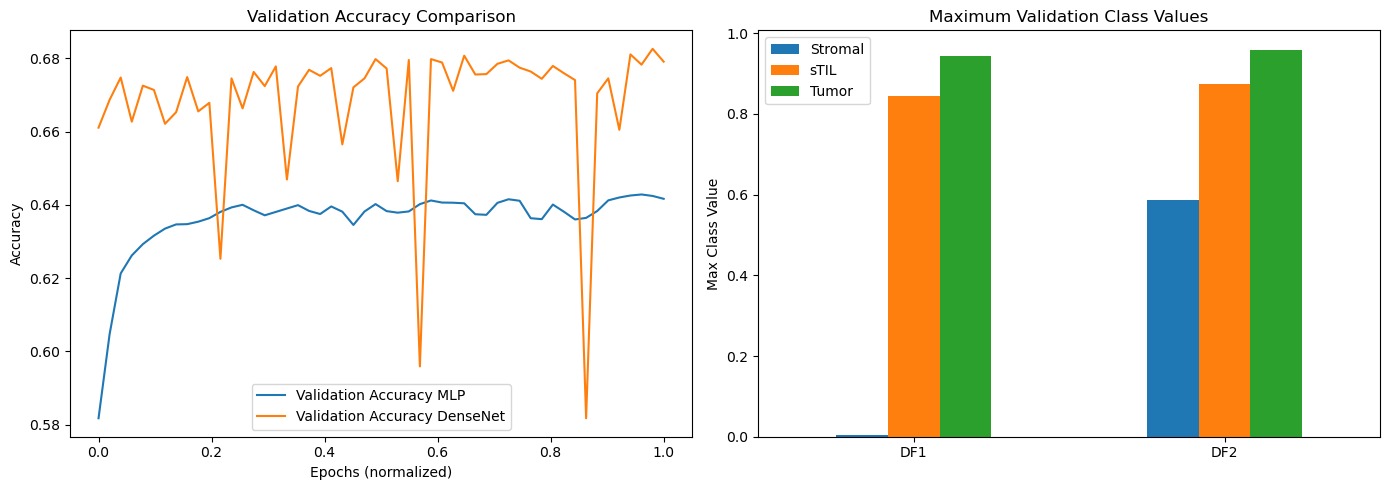

In [58]:
compare_validation_accuracies_3class(sup3_mlp, sup3_dnn)